# Gradientes

In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
print(cv.__version__)

3.4.2



Tamaño imagen: (350, 735) 


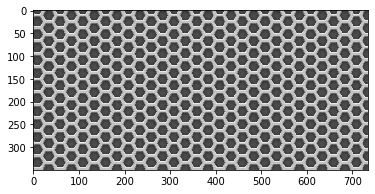

In [5]:
img = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print('\nTamaño imagen: {} '.format(gray.shape))

plt.imshow(img)
plt.show()

##  Determinación de gradientes en x e y con Sobel

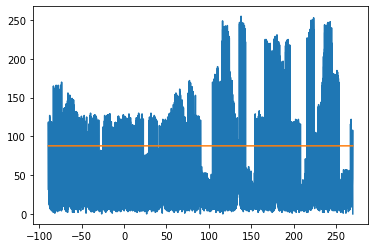

In [27]:
# Sobel en dirección x
sobelx_64 = cv.Sobel(gray,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = (absx_64/absx_64.max())*255
sobelx_8u = np.uint8(sobelx_8u1)

# Sobel en dirección y
sobely_64 = cv.Sobel(gray,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = (absy_64/absy_64.max())*255
sobely_8u = np.uint8(sobely_8u1)

# Cálculo de la magnitud con la hipotenusa
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Cálculo del ángulo con la arcotangente
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

# Aplanamos la matriz para poder realizar operaciones de arrays
flatten_mag = mag.flatten()
flatten_ang = angle.flatten()

# Obtenemos los valores únicos de magnitud y sus indices
u_mag, mag_indices = np.unique(flatten_mag, return_index=True)
u_mag = u_mag.reshape(-1, 1)
mag_indices = mag_indices.reshape(-1, 1)

# Sumamos 90° a los ángulos calculados
flatten_ang = flatten_ang + 90

# Ordenamos el vector de magnitudes únicas de mayor a menor
order_u_mag = u_mag[: :-1]
order_mag_indices = mag_indices[: : -1]

# Aplicamos una máscara para quedarnos únicamente con las magnitudes mayores a 200
mask = order_u_mag > 200

# Se imprimen los valores de magnitud y ángulo correspondientes a la máscara
#print(order_u_mag[mask], flatten_ang[order_mag_indices[mask]])


# Se realiza el proceso inverso para obtener valor angulares únicos y graficar magnitud vs angulo

u_ang, ang_indices = np.unique(flatten_ang, return_index=True)
u_ang = u_ang.reshape(-1, 1)
ang_indices = ang_indices.reshape(-1, 1)
media_intensidad = np.mean(flatten_mag[ang_indices])*np.ones_like(u_ang)
# Grafica mag vs ang.

plt.figure(1)
plt.plot(u_ang, flatten_mag[ang_indices])
plt.plot(u_ang, media_intensidad)
plt.show()

# En la gráfica se observa que las mayores magnitudes se encuentran para los ángulos de 135, 180 y 225 lo cual coincide con la imagen

# Subdividimos el rango angular en 100 steps
ang_div = np.linspace(np.amin(flatten_ang), np.amax(flatten_ang), 100)
int_div = np.zeros_like(ang_div)
# for i, div in enumerate(ang_div):
    

## Gráfica de las direcciones